SYRIATEL CUSTOMER CHURN PREDICTION

AUTHOR : KELVIN MWAURA NJUNG'E

COHORT : DSFT08 (REMOTE)


BUSINESS UNDERSTANDING

Project Overview


Syriatel, a telecommunications company, is experiencing a significant rate of customer churn. Customer churn, or the rate at which customers stop doing business with a company, is a critical issue in the telecom industry. Retaining customers is not only more cost-effective than acquiring new ones but also crucial for sustaining profitability and market position. This project aims to build a predictive model to identify customers who are likely to churn, enabling Syriatel to implement proactive retention strategies to mitigate revenue loss.


STAKEHOLDERS

Primary Stakeholder:

Syriatel Mobile Telecom: The telecom company that will use the model to reduce customer churn and improve profitability.


Other Stakeholders:

Shareholders: Will benefit from increased profitability and market stability.

Employees: Will benefit from a more stable business environment and potentially better compensation.

Customers: Will benefit from improved services and customer support.

BUSINESS PROBLEM

The main business problem is the high rate of customer churn at Syriatel, leading to substantial revenue loss and increased costs associated with acquiring new customers. The goal is to develop a predictive model that can identify customers who are likely to churn, allowing Syriatel to take targeted actions to retain these customers and reduce overall churn rates.

Project Scope

In-Scope:


Identifying key features that predict customer churn.

Developing a robust classification model to predict churn.

Providing actionable insights and recommendations for retention of more customers


Out-of-Scope:

Directly implementing the retention strategies.

Long-term monitoring and adjustments of the model post-deployment.

RESEARCH OBJECTIVES

- Identify key features that determine customer churn. 

    We Analyze the relative importance of various features to uncover the key factors behind customer churn in the telecommunications sector. By pinpointing the most impactful contributors to churn, SyriaTel can gain valuable insights that will guide in them making strategic decisions, optimize resource allocation, and implement targeted initiatives to mitigate customer attrition effectively.


- Develop the most suitable model to predict customer churn.

 To compare the performance of different machine learning models to identify the most effective model for predicting churn.

 By comparing the performance of various models, SyriaTel can confidently select the most efficient one. This ensures that resources are optimally allocated for the implementation of churn-reduction strategies.

- Establish customer retention strategies to reduce churn.

 This endeavor is motivated by the notion that by accurately identifying customers at risk of churning, SyriaTel can proactively implement targeted retention strategies. These strategies may involve offering incentives, improving customer service experiences, and tailoring marketing approaches to align with the preferences of the at-risk customer segments. 



SUCCESS METRICS


- Achieve a high recall score  to ensure most at-risk customers are correctly identified.

- Identify key features that significantly contribute to customer churn.

- Provide clear, actionable recommendations for reducing churn and improving customer retention.

- Show the effectiveness of the churn prediction model in enabling proactive retention strategies and minimizing revenue losses.







DATA UNDERSTANDING


To better serve the identified consumers and clearly project the problem(s) stated in the background, I will use the Churn in Telecom's dataset from Kaggle (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).



The dataset contains 3333 ROWS and 21 columns, including information about the state, account length, area code, phone number, international plan, voice mail plan, number of voice mail messages, total day minutes, total day calls, total day charge, total evening minutes, total evening calls, total evening charge, total night minutes, total night calls, total night charge, total international minutes, total international calls, total international charge, customer service calls and churn.


DATASET FEATURES:


State: The state the customer lives in

Account Length: The number of days the customer has had an account.

Area Code: The area code of the customer

Phone Number: The phone number of the customer

International Plan: True if the customer has the international plan, otherwise false.

Voice Mail Plan: True if the customer has the voice mail plan, otherwise false.

Number Vmail Messages: the number of voicemails the customer has sent.

Total Day Minutes: total number of minutes the customer has been in calls during the day.

Total Day Calls: total number of calls the user has done during the day.

Total Day Charge: total amount of money the customer was charged by the Telecom company for calls during the day.

Total Eve Minutes: total number of minutes the customer has been in calls during the evening.

Total Eve Calls: total number of calls the customer has done during the evening.

Total Eve Charge: total amount of money the customer was charged by the Telecom company for calls during the evening.

Total Night Minutes: total number of minutes the customer has been in calls during the night.

Total Night Calls: total number of calls the customer has done during the night.

Total Night Charge: total amount of money the customer was charged by the Telecom company for calls during the night.

Total Intl Minutes: total number of minutes the user has been in international calls.

Total Intl Calls: total number of international calls the customer has done.

Total Intl Charge: total amount of money the customer was charged by the Telecom company for international calls.

Customer Service Calls: number of calls the customer has made to customer service.

Churn: true if the customer terminated their contract, otherwise false

IMPORTING THE NECESSARY LIBRARIES  TO USE DURING THE REST OF THE PROJECT FOR CLEANING, MODELLING AND OPTIMIZING.





In [142]:
# Data manipulation 
import pandas as pd 
import numpy as np 
import os 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [160]:
class DataFrameLoader:
    """
    A class to load and preprocess CSV data into a Pandas DataFrame,
    including loading, preprocessing 
    
    """

    def __init__(self, file_name):
        """
        Initialize the DataFrameLoader object with the name of the CSV file to load.

        Parameters:
        file_name (str): The name of the CSV file to load.
        """
        self.file_name = file_name
        self.data = None

    def load_data(self):
        """
        Loads the CSV data into a Pandas DataFrame.

        This method attempts to read the CSV file located in the current working directory.
        It handles exceptions for missing files and other errors gracefully.
        """
        try:
            current_dir = os.getcwd()
            file_path = os.path.join(current_dir, self.file_name)
            self.data = pd.read_csv(file_path)
            print(f"Data loaded successfully from {self.file_name}")
        except FileNotFoundError:
            print(f"Error: File {self.file_name} not found in the current directory.")
        except Exception as e:
            print(f"Error: {e}")

    

    def get_shape(self):
        """
        Prints the shape of the DataFrame (number of rows and columns).

        Returns:
        None
        """
        if self.data is not None:
            rows, columns = self.data.shape
            print(f"The DataFrame has {rows} rows and {columns} columns.")
        else:
            print("Data not loaded yet. Please call the load_data() method first.")

    def get_info(self):
        """
        Prints detailed information about the DataFrame, such as column names, data types, and memory usage.

        Returns:
        None
        """
        if self.data is not None:
            print(self.data.info())
        else:
            print("Data not loaded yet. Please call the load_data() method first.")
    def handle_missing_values(self):
        if self.data is not None:
            for col in self.data.columns:
                try:
                    # Attempt to convert column to numeric; if fails, it's likely categorical
                    pd.to_numeric(self.data[col], errors='coerce')
                    # Replace missing values with mean for numerical columns
                    self.data[col].fillna(self.data[col].mean(), inplace=True)
                except ValueError:
                    # Column is categorical, replace missing values with mode
                    self.data[col].fillna(self.data[col].mode()[0], inplace=True)
            print("Missing values handled.")
        else:
            print("Data not loaded yet. Please call the load_data() method first.")


    def describe_data(self):
        """
        Prints descriptive statistics of the DataFrame, excluding NaN values.

        Returns:
        None
        """
        if self.data is not None:
            print(self.data.describe())
        else:
            print("Data not loaded yet. Please call the load_data() method first.")

    def get_head(self, num_rows=5):
        """
        Returns the first `num_rows` rows of the DataFrame.

        Parameters:
        num_rows (int): Number of rows to return. Default is 5.

        Returns:
        DataFrame: The first `num_rows` rows of the DataFrame.
        None: If data has not been loaded.
        """
        if self.data is not None:
            return self.data.head(num_rows)
        else:
            print("Data not loaded yet. Please call the load_data() method first.")
            return None

    def check_duplicates(self):
        """
        Checks for duplicate rows in the DataFrame and prints the count.

        Returns:
        None
        """
        if self.data is not None:
            duplicates = self.data.duplicated().sum()
            if duplicates > 0:
                print(f"There are {duplicates} duplicate rows in the DataFrame.")
            else:
                print("No duplicate rows found in the DataFrame.")
        else:
            print("Data not loaded yet. Please call the load_data() method first.")

    def remove_duplicates(self):
        """
        Removes duplicate rows from the DataFrame.

        Returns:
        None
        """
        if self.data is not None:
            original_rows = self.data.shape[0]
            self.data.drop_duplicates(inplace=True)
            new_rows = self.data.shape[0]
            print(f"Removed {original_rows - new_rows} duplicate rows from the DataFrame.")
        else:
            print("Data not loaded yet. Please call the load_data() method first.")

# Utilize the function
file_name = 'bigml_59c28831336c6604c800002a.csv'
df_loader = DataFrameLoader(file_name)

# Load data
df_loader.load_data()


Data loaded successfully from bigml_59c28831336c6604c800002a.csv


In [144]:
#see first ten columns of the df
df_loader.get_head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [145]:
# Get shape of the data frame
df_loader.get_shape()

The DataFrame has 3333 rows and 21 columns.


Seeing that I have sufficient data points I can now proceed with the rest of the project without need to scrape or get more data elsewhere.

In [146]:
#knowing the data types of our data frame
df_loader.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

we can see that there are no missing values in our data set

In [147]:

# get the inferential statistics of our dataset
df_loader.describe_data()

       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

DATA PREPARATION
In this phase, which is often referred to as “data munging”, we will perform data cleaning, conduct exploratory data analysis (EDA), and data preprocessing.

In [148]:
df_loader.check_duplicates()


No duplicate rows found in the DataFrame.


In as much as we don't have any missing values and duplicate values we can further investigate the different columns to see how we can further clean the data and manipulate the different columns.
Since we have confirmed that there are no duplicates or missing values in our dataset, we can use the phone number column as our index to identify each customer.
The logic here is that each customer has a unique phone number.

In short it is our unique identifier


In [149]:
def set_phone_number_as_index(df_loader):
    """
    Sets the 'phone number' column as the index of the DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to modify.

    Returns:
    pandas.DataFrame: The DataFrame with 'phone number' set as the index.
    """
    df_loader.set_index('phone number', inplace=True)
    return df_loader

# Assuming df_loader.data contains your DataFrame after loading and preprocessing
df_with_phone_number_as_index = set_phone_number_as_index(df_loader.data)


In [150]:
#making sure the changes have been effected
df_loader.get_head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
phone number,,,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
371-7191,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
358-1921,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
375-9999,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
330-6626,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


EXPLORATORY DATA ANALYSIS(EDA)

Seeing that we don't have much cleaning to do we can now proceed to the next bit of our project.

This section focuses on exploring and understanding the dataset to uncover patterns, identify variable relationships, detect outliers, and gain insights before applying modeling or statistical techniques. We will conduct a comprehensive exploration using univariate, bivariate, and multivariate analysis to identify correlations and variable distributions, essential for feature engineering and modeling.


Univariate data analysis;

This examines a single variable. In our project, this involves analyzing the distribution of each feature to understand its characteristics and identify potential issues, such as outliers.

We begin with the target variable, churn, to understand its distribution. This categorical variable has boolean values (True or False) indicating whether a client is likely to churn.

First, we visualize the data distribution in this column using a pie chart.

Data loaded successfully from bigml_59c28831336c6604c800002a.csv


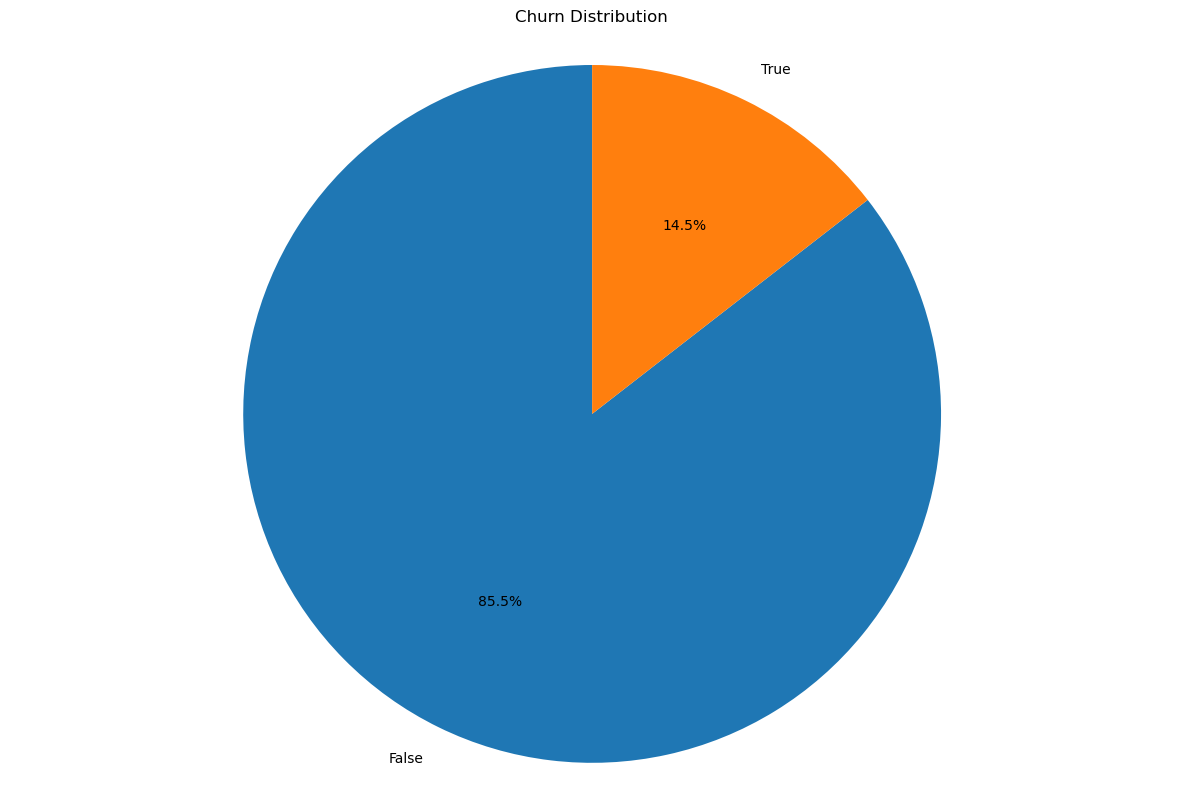

In [159]:


class DataAnalysis:
    """
    A class for performing data analysis on a given DataFrame.
    """

    def __init__(self, data):
        """
        Initialize the DataAnalysis object with the data to analyze.

        Parameters:
        data: The data to analyze.
        """
        self.data = data

    def plot_churn_distribution(self):  #Plot the distribution of the 'churn' column as a pie chart.
        
         # Get the value counts for the 'churn' column
        churn_counts = self.data['churn'].value_counts()

        # Create a new figure with a larger size
        plt.figure(figsize=(15, 10))

        # Create a pie chart
        plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title('Churn Distribution')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        plt.show()

    def plot_histograms(self):
        """
        Function to plot histograms for the distribution of all numerical features.
        """
        # Filter out numerical columns
        numerical_cols = self.data.select_dtypes(include=['int64', 'float64']).columns.tolist()

        # Calculate number of rows and columns for subplots
        num_cols = len(numerical_cols)
        num_rows = (num_cols + 1) // 2

        # Create a figure with multiple subplots
        fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 6 * num_rows))

        # Flatten the axes array
        axes = axes.flatten()

        # Plot histograms for each numerical feature
        for i, col in enumerate(numerical_cols):
            sns.histplot(data=self.data[col], ax=axes[i], kde=True, bins=20)
            axes[i].set_title(f'Histogram for {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')

        # Hide empty subplots
        for j in range(num_cols, len(axes)):
            axes[j].axis('off')

        # Adjust layout
        plt.tight_layout()

        # Show the plot
        plt.show()

    def check_outliers(self):
        """
        Function to check for outliers in all numerical columns using boxplots.
        """
        # Filter out numerical columns
        numerical_cols = self.data.select_dtypes(include=['int64', 'float64']).columns.tolist()

        # Divide the numerical columns into two equal parts
        mid = len(numerical_cols) // 2
        cols1 = numerical_cols[:mid]
        cols2 = numerical_cols[mid:]

        # Create a figure with one row and two columns
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

        # Create a boxplot for the first subset of numerical columns in the first column
        sns.boxplot(data=self.data[cols1], ax=axes[0])
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
        axes[0].set_title('Boxplots for Subset 1')

        # Create a boxplot for the second subset of numerical columns in the second column
        sns.boxplot(data=self.data[cols2], ax=axes[1])
        axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
        axes[1].set_title('Boxplots for Subset 2')

        # Setting the figure title
        fig.suptitle('Boxplots for Different Subsets of Numerical Columns', fontsize=16)

        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.4)

        # Show the plot
        plt.show()


    file_name = 'bigml_59c28831336c6604c800002a.csv'

# Create an instance of DataFrameLoader with the specified file name
loader = DataFrameLoader(file_name)
# Load the data from the CSV file
loader.load_data()

# If data is loaded successfully, proceed with data analysis
if loader.data is not None:
    # Create an instance of DataAnalysis with the loaded data
    data_analysis = DataAnalysis(loader.data)
    # Check for outliers excluding the 'churn' column
    data_analysis.plot_churn_distribution()
    


The dataset contained 3,333 customers, out of which 483 customers terminated their contract with the Telecom firm. This represents a customer churn rate of 14.5%. An analysis of the binary target variable (whether the customer churned or not) reveals an imbalance in the class distribution. Such an imbalanced dataset can lead to biased predictions from machine learning models if not addressed appropriately.




Let's examaine the distribution of the numerical columns.    We will plot the histograms by calling the plot histogram function

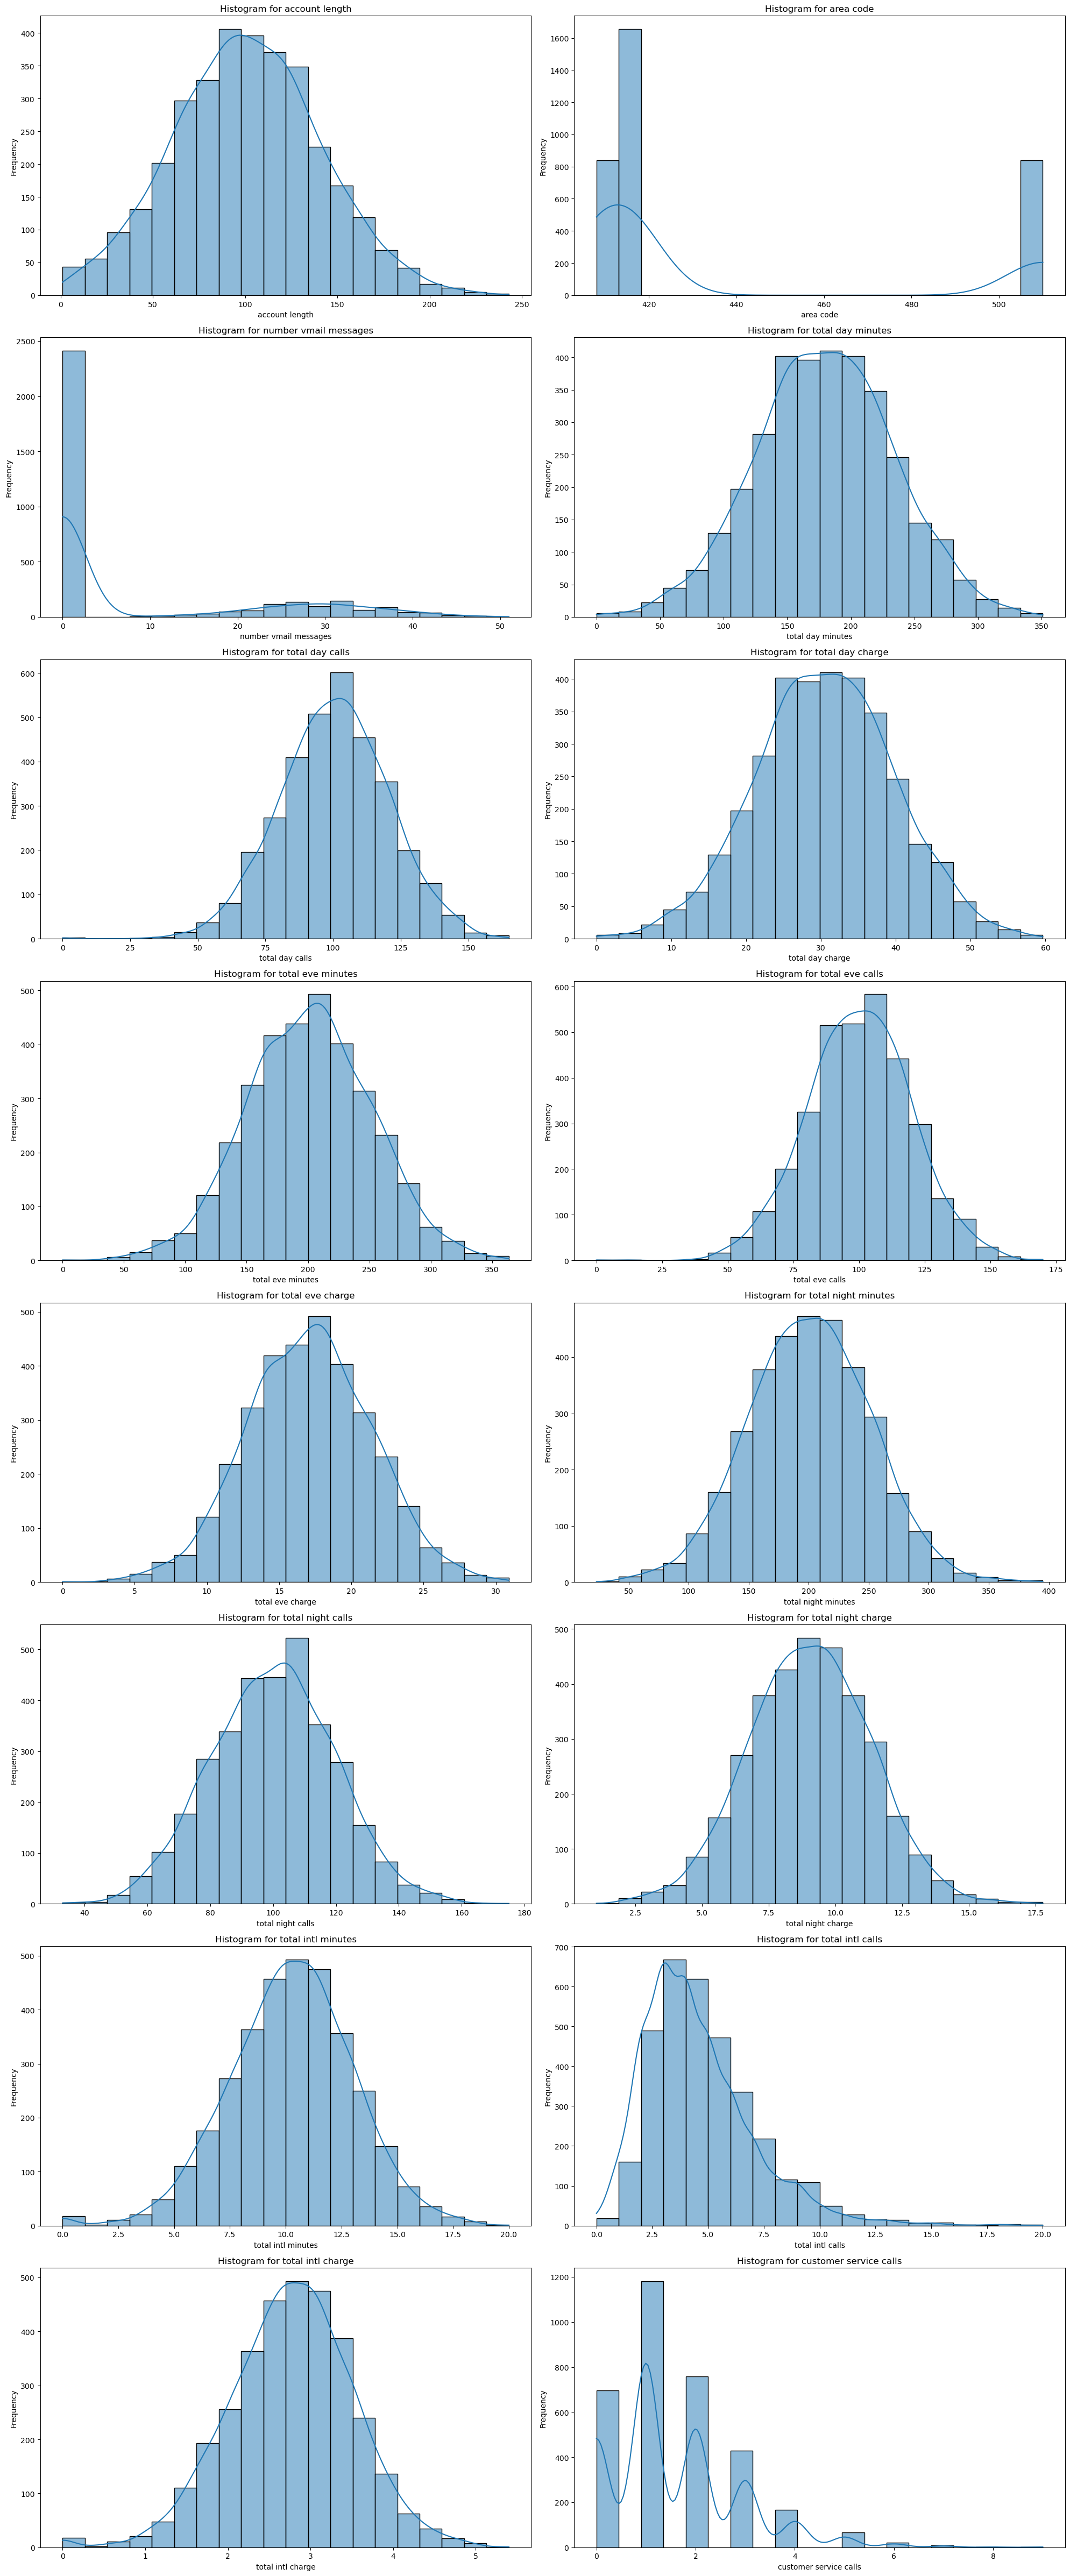

In [161]:
data_analysis.plot_histograms()



For the distribution plots of the numerical features above, all of them, except for 'customer service calls', 'area codes', and 'number of voicemail messages', exhibit a normal distribution. Although 'total international calls' appears to be skewed to the right, it generally maintains a normal distribution. The 'customer service calls' feature shows several peaks, indicating the presence of multiple modes within the population.

We check for skewness and standardize the data to improve the performance and reliability of machine learning models. Skewness indicates asymmetry in the data distribution, which can negatively impact model performance. By applying log transformation to highly skewed features, we make the distribution more symmetric. 

Standardizing the data ensures that all features have a mean of zero and a standard deviation of one, which helps in faster convergence and better performance of many machine learning algorithms, particularly those that rely on distance metrics eg KNN  or assume normally distributed data.

Data loaded successfully from bigml_59c28831336c6604c800002a.csv


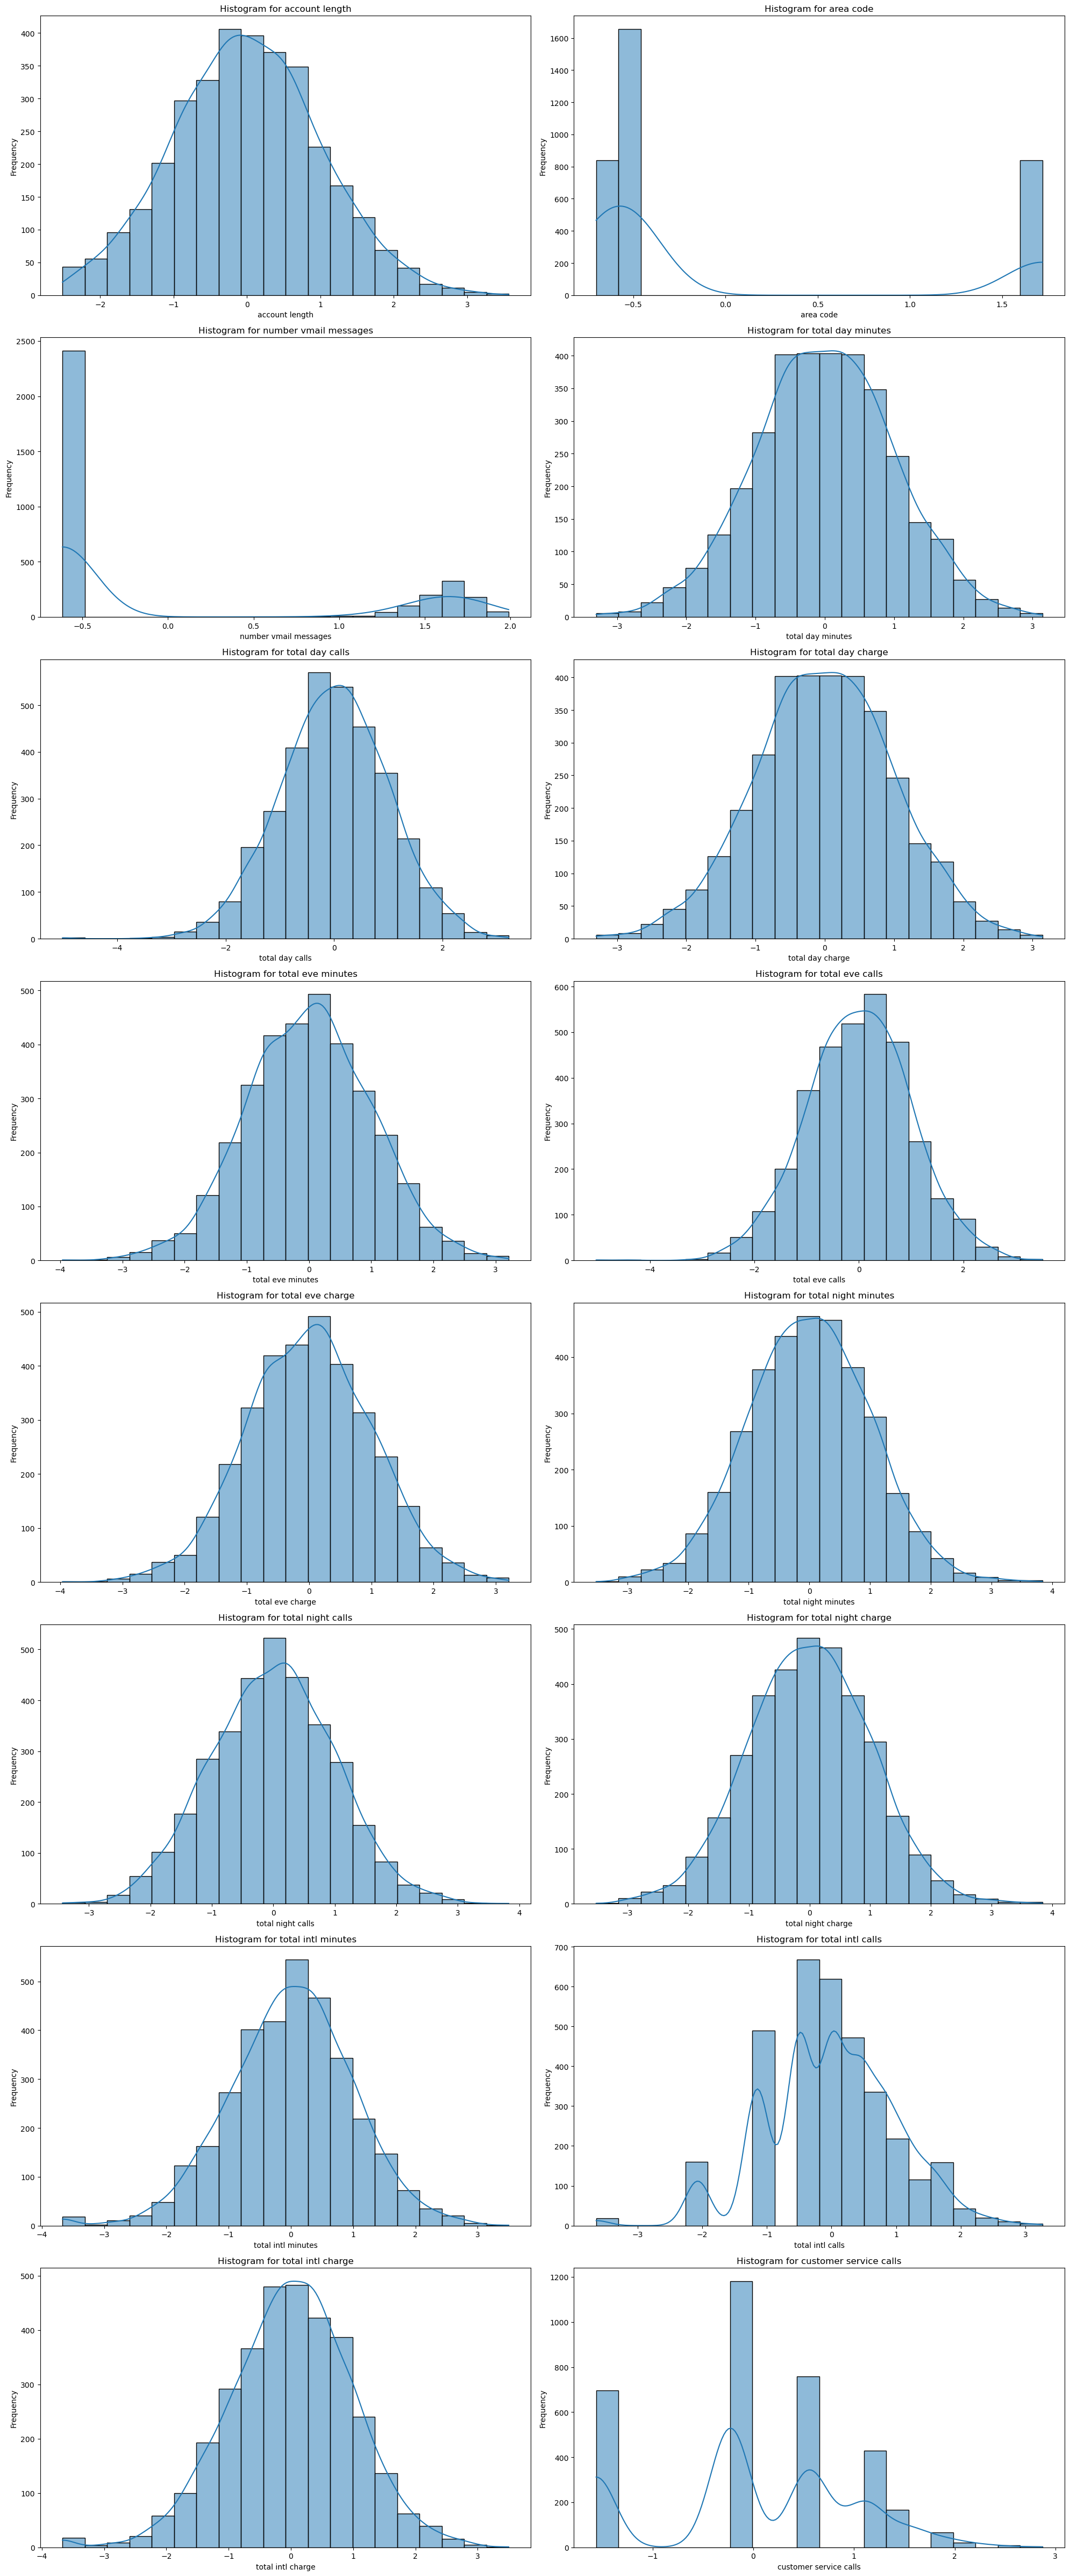

In [164]:
class SkewnessHandler(DataAnalysis):
    def identify_skewed_columns(self, threshold=1.0):
        numerical_cols = self.data.select_dtypes(include=['int64', 'float64']).columns
        skewed_cols = [col for col in numerical_cols if abs(self.data[col].skew()) > threshold]
        return skewed_cols

    def log_transform(self, cols):
        self.data[cols] = self.data[cols].apply(lambda x: np.log1p(x))

class StandardScalerHandler(SkewnessHandler):
    def normalize_standard(self):
        numerical_cols = self.data.select_dtypes(include=['int64', 'float64']).columns
        scaler = StandardScaler()
        self.data[numerical_cols] = scaler.fit_transform(self.data[numerical_cols])

file_name = 'bigml_59c28831336c6604c800002a.csv'

loader = DataFrameLoader(file_name)
loader.load_data()

if loader.data is not None:
    data_analysis = StandardScalerHandler(loader.data)
    
    # Identify skewed columns
    skewed_cols = data_analysis.identify_skewed_columns(threshold=1.0)

    # Transform skewed columns
    data_analysis.log_transform(skewed_cols)

    # Normalize all numerical columns
    data_analysis.normalize_standard()

    # Check the outliers and histograms after normalization and transformation
    data_analysis.plot_histograms()

Let's now do a univariate analysis of the categorical columns and see their dstribution

Before proceeding with model building, it is essential to identify and handle any potential outliers in the numerical features. Outliers can significantly influence the distribution of values and subsequently impact the feature engineering process and the performance of machine learning algorithms. Therefore, a thorough review of the numerical data columns will be conducted to detect and treat outliers, ensuring a more robust modeling process.

Let's check the outliers in the numerical columns and plot them by calling the check outliers function.

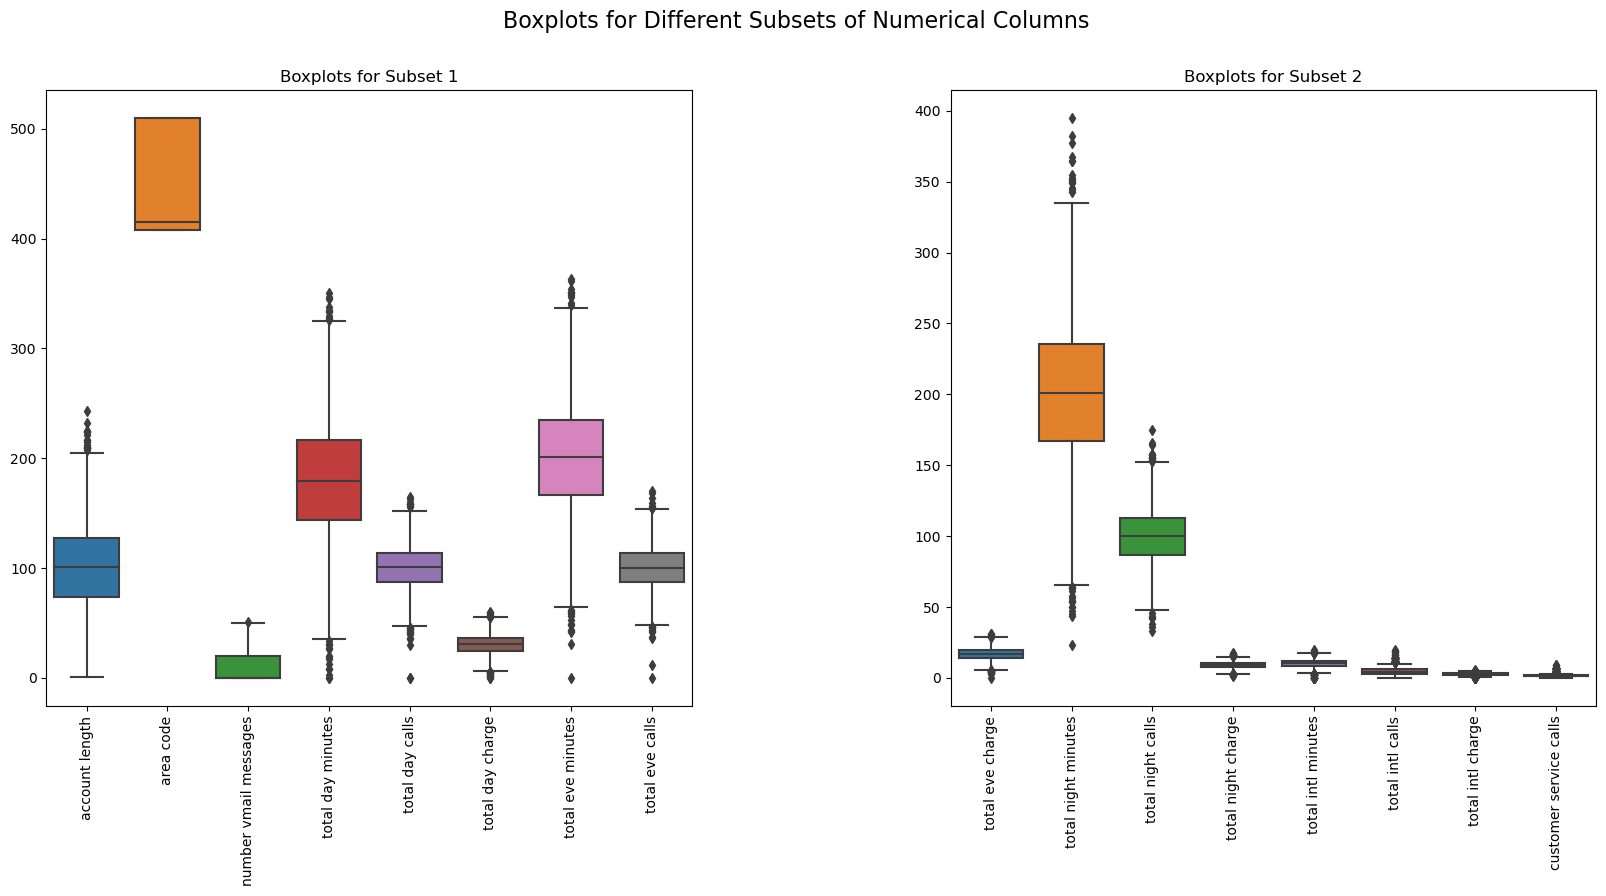

In [152]:
data_analysis.check_outliers()